In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
from sklearn.metrics import  classification_report

# Новый раздел

**Загружаем и подготавливаем данные**

In [2]:
df = pd.read_csv('star_classification.csv')

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [3]:
X = df.drop(['class'], axis=1)

In [4]:
Y = df['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

**Случайный лес**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators=100, max_depth = 4, random_state=42, n_jobs=-1)

In [15]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=42)

In [16]:
y_pred_rf = rfc.predict(X_test)

In [17]:
print(precision_score(y_test, y_pred_rf, average='macro'))
print(precision_score(y_test, y_pred_rf, average='weighted'))

0.948557411452884
0.9457663506935725


In [17]:
print(classification_report(y_test, y_pred_rf))

NameError: ignored

**Бустинги**
**Adaboost**

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [8]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=10,
    algorithm="SAMME", #algorithm="SAMME.R"
    learning_rate=0.5, random_state=42)

In [13]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.5, n_estimators=10, random_state=42)

In [14]:
y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))

0.96432


In [15]:
print(precision_score(y_test, y_pred_ada, average='macro'))
print(precision_score(y_test, y_pred_ada, average='weighted'))

0.9590185935086705
0.9643186749008861


In [19]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14895
           1       1.00      1.00      1.00      5336
           2       0.91      0.91      0.91      4769

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



**GradientBoost**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
gbc = GradientBoostingClassifier(n_estimators = 20,
                                max_depth = 4,
                                random_state = 15)

In [24]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=20, random_state=15)

In [25]:
pred = gbc.predict(X_test)
accuracy_score(y_test, pred)

0.97224

In [26]:
y_pred_gbc = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))

0.96432


In [27]:
print(precision_score(y_test, y_pred_ada, average='macro'))
print(precision_score(y_test, y_pred_ada, average='weighted'))
print(classification_report(y_test, y_pred_gbc))

0.9590185935086705
0.9643186749008861
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14895
           1       1.00      1.00      1.00      5336
           2       0.91      0.91      0.91      4769

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



Творческая задача (из раздела машинное зрение).
Рассмотрим колесо от тележки, которая движется по рельсу. Подшипник колеса закрыт металлическим колпаком, колпак прикручен к колесу четырьмя болтами, болты визуально различимы.

Схема колеса ))
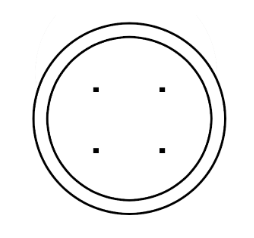

Ваша задача придумать алгоритм, который будет давать ответ на вопрос - катится колесо по рельсу или скользит. 


Принимаются любые идеи в письменном виде.
Код писать необязательно.


1. Фиксируем положение болтов.
2. Если колесо именно катится, то болты перемещаются по круговому контуру (т.е. движение не хаотично, направленно по часовой стрелке либо против неё) 
3. Если колесо катится, то болты могут либо стоять на месте либо двигатсья в произвольном направлении от направления движения.


В идеале конечно было бы неплохо перекрасить болты (или болт) в разные цвета для облегчения определения. Но тогда появляется сложность в виде освещения, теней, и т.д.


Можно ещё фиксировать температуру колеса, при кручении колеса по рельсу, температура будет равномерна по контуру колеса. Если колесо будет скользить, то часть, где происходит трение будет более горячей.


Также можно записать звук, когда колесо катится. При скольжении звук будет другим.

# Новый раздел